# EDA - Jogos Olímpicos

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
athletesDf = pd.read_csv('../originalDataSet/athlete_events.csv')

In [28]:
athletesDf.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
athletesDf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,271116.0,NaN,NaN,NaN,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Name,271116,134732,Robert Tait McKenzie,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,271116,2,M,196594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,261642.0,NaN,NaN,NaN,25.556898,6.393561,10.0,21.0,24.0,28.0,97.0
Height,210945.0,NaN,NaN,NaN,175.33897,10.518462,127.0,168.0,175.0,183.0,226.0
Weight,208241.0,NaN,NaN,NaN,70.702393,14.34802,25.0,60.0,70.0,79.0,214.0
Team,271116,1184,United States,17847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOC,271116,230,USA,18853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Games,271116,51,2000 Summer,13821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,271116.0,NaN,NaN,NaN,1978.37848,29.877632,1896.0,1960.0,1988.0,2002.0,2016.0


Pode-se perceber algumas coisas:
- Existem 271 mil entradas na tabela, sendo que existem 134 mil nomes únicos.
- Robert Tait McKenzie possui 58 entradas na tabela
- A média de idade é de 25.6 anos sendo o mínimo igual a 10 e o máximo igual a 97
- A média de altura é de 175 cm sendo o mínimo igual a 127 cm e o máximo igual a 226 cm
- A média de peso é 70.7 Kg
- A grande maioria dos dados são sobre jogos de verão com 222 mil entradas
- O evento mais frequente é o Football Men's Football

In [13]:
athletesDf.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Uma análise específica para os dados nulos foi feita no analiseInicial.ipynb

<AxesSubplot:>

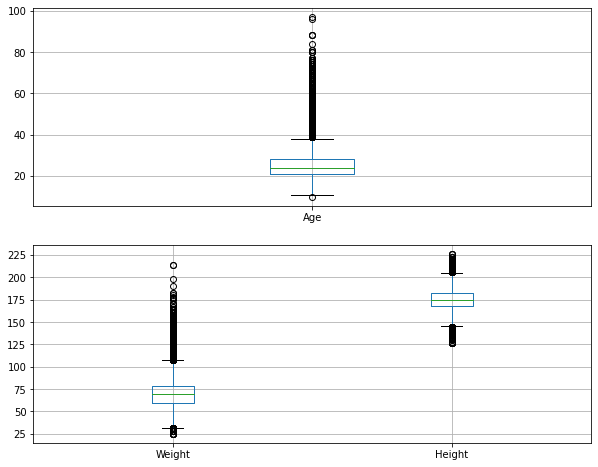

In [26]:
plt.figure(figsize=(10,8))
plt.subplot(211)
athletesDf[['Age']].boxplot()
plt.subplot(212)
athletesDf[['Weight','Height']].boxplot()

# Homens e mulheres ao longo dos anos

In [34]:
uniqueAthletes = athletesDf.drop_duplicates(['ID','Games'])

In [36]:
maleFemalePerYear = uniqueAthletes.groupby('Year')['Sex'].value_counts()

In [49]:
maleFemalePerYear[maleFemalePerYear.index.get_level_values('Sex') == 'M'].values

array([ 176, 1201,  644,  835, 1980, 2356, 2598, 3400, 3368, 1952, 4711,
       4547, 4996, 3652, 5260, 5351, 5724, 6856, 5710, 4972, 6225, 7361,
       7976, 1216, 6822, 1390, 6579, 1513, 6257, 1539, 6290, 1503, 5863,
       1643, 6145], dtype=int64)

In [54]:
maleFemalePerYear.index.get_level_values('Year').unique()

Int64Index([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
            1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
            1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
            2014, 2016],
           dtype='int64', name='Year')

Text(0.5, 1.0, 'Quantidade de homens e mulheres ao longo dos jogos')

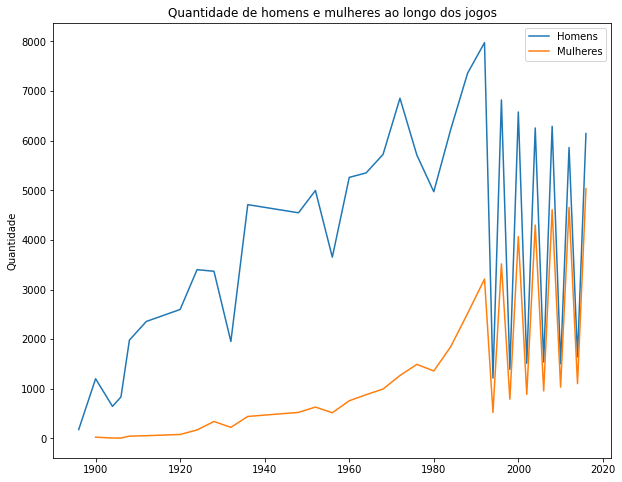

In [62]:
plt.figure(figsize=(10,8))
males = maleFemalePerYear[maleFemalePerYear.index.get_level_values('Sex') == 'M']
plt.plot(maleFemalePerYear.index.get_level_values('Year').unique(), males.values, label='Homens')
females = maleFemalePerYear[maleFemalePerYear.index.get_level_values('Sex') == 'F']
plt.plot(maleFemalePerYear.index.get_level_values('Year').unique()[1:], females.values, label='Mulheres')
plt.legend()
plt.ylabel("Quantidade")
plt.title("Quantidade de homens e mulheres ao longo dos jogos")

Em 1896 as mulheres não participaram. Esse gráfico inclui tanto jogos de inverno quanto jogos de verão. De acordo com o [Wikipedia](https://pt.wikipedia.org/wiki/Jogos_Ol%C3%ADmpicos_de_Inverno#1984_a_1998), até 1994 os Jogos Olímpicos de Inverno eram realizados no mesmo ano que os Jogos Olímpicos de Verão. Isso mudou em 1994, quando os jogos alternaram a cada 2 anos.